<a href="https://colab.research.google.com/github/UTK31-ai/Talent-battle-code-movie/blob/main/Movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Movie recommended system
https://www.kaggle.com/datasets/dev0914sharma/dataset

Import libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
df=pd.read_csv('Amazon.csv')
df.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


In [22]:
#removing NAN
df_1=df.fillna(0.0)
df_1.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH3QC2PC1VTGP,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3LKP6WPMP9UKX,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVIY68KEPQ5ZD,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A1CV1WROP5KTTW,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


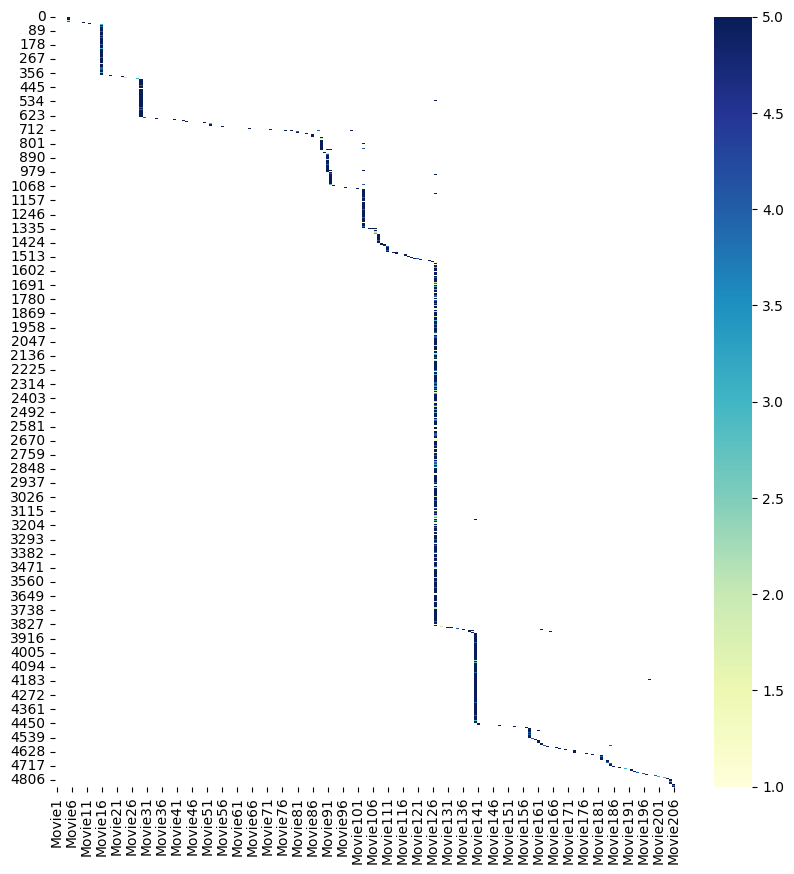

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('user_id',axis=1),cmap="YlGnBu")
plt.show()

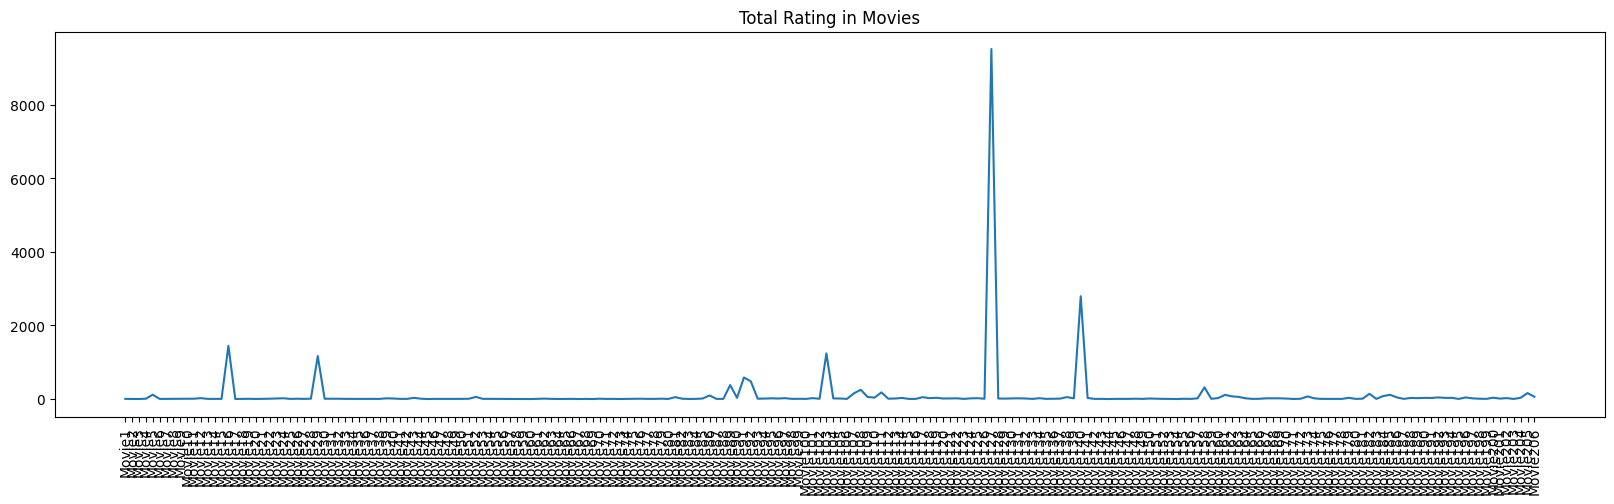

In [24]:
plt.figure(figsize=(20,5))
plt.title('Total Rating in Movies')
plt.plot(df.drop('user_id',axis=1).sum())
plt.xticks(rotation=90)
plt.show()

In [25]:
df.shape

(4848, 207)

Movie Recommendation based on votes 

In [26]:
arr=[]
for i in df_1.columns:
  #print(df[i].isnull().sum())
  if df[i].isnull().sum()!=4848:
    arr.append(i)

df_actual=df[arr]
df_actual.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_actual.shape

(4848, 207)

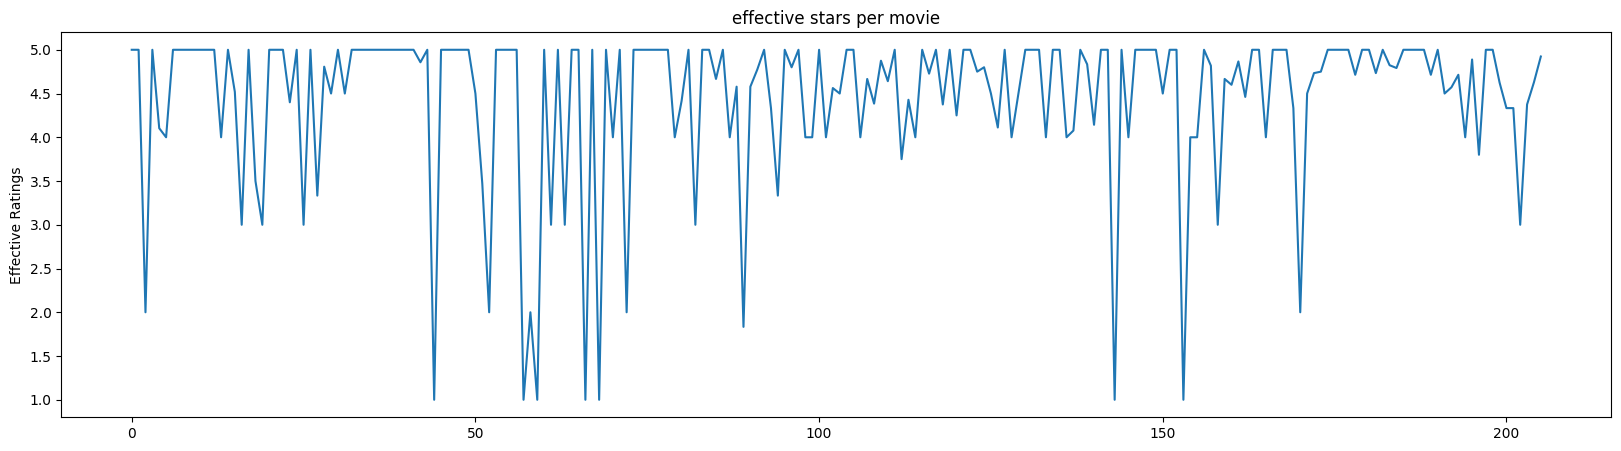

In [28]:
arr=[]
pep_cnt=[]
for col in df_actual.drop('user_id',axis=1).columns:
  arr.append(df_actual[col].sum()/(4848-df_actual[col].isnull().sum()))
  pep_cnt.append((4848-df_actual[col].isnull().sum()))
plt.figure(figsize=(20,5))
plt.title('effective stars per movie')
plt.ylabel('Effective Ratings')
plt.plot(arr)
plt.show()

In [29]:
df_ranked=pd.DataFrame({'movie_name':np.arange(1,207,1),'eff_score':arr,'votes':pep_cnt})
df_ranked.head()

,movie_name,eff_score,votes
0,1,5.000000,1
1,2,5.000000,1
2,3,2.000000,1
3,4,5.000000,2
4,5,4.103448,29


Best rating recommendation

In [30]:
df_ranked.sort_values(by=['eff_score','votes'],ascending=False)

,movie_name,eff_score,votes
185,186,5.0,9
187,188,5.0,6
190,191,5.0,6
11,12,5.0,5
100,101,5.0,5
...,...,...,...
59,60,1.0,1
66,67,1.0,1
68,69,1.0,1
143,144,1.0,1


In [31]:
x=df_ranked[df_ranked['eff_score']>4]
Best_movie_per_rating=[]
for i in x['movie_name']:
  Best_movie_per_rating.append(i)
np.asarray(Best_movie_per_rating).reshape(23,7)

array([[  1,   2,   4,   5,   7,   8,   9],
       [ 10,  11,  12,  13,  15,  16,  18],
       [ 21,  22,  23,  24,  25,  27,  29],
       [ 30,  31,  32,  33,  34,  35,  36],
       [ 37,  38,  39,  40,  41,  42,  43],
       [ 44,  46,  47,  48,  49,  50,  51],
       [ 54,  55,  56,  57,  61,  63,  65],
       [ 66,  68,  70,  72,  74,  75,  76],
       [ 77,  78,  79,  81,  82,  84,  85],
       [ 86,  87,  89,  91,  92,  93,  94],
       [ 96,  97,  98, 101, 103, 104, 105],
       [106, 108, 109, 110, 111, 112, 114],
       [116, 117, 118, 119, 120, 121, 122],
       [123, 124, 125, 126, 127, 128, 130],
       [131, 132, 133, 135, 136, 138, 139],
       [140, 141, 142, 143, 145, 147, 148],
       [149, 150, 151, 152, 153, 157, 158],
       [160, 161, 162, 163, 164, 165, 167],
       [168, 169, 170, 172, 173, 174, 175],
       [176, 177, 178, 179, 180, 181, 182],
       [183, 184, 185, 186, 187, 188, 189],
       [190, 191, 192, 193, 194, 196, 198],
       [199, 200, 201, 202, 204,

Best Popularity

In [32]:
df_ranked.sort_values(by=['votes','eff_score'],ascending=False)

,movie_name,eff_score,votes
126,127,4.111976,2313
139,140,4.833910,578
15,16,4.518750,320
102,103,4.562500,272
28,29,4.806584,243
...,...,...,...
59,60,1.000000,1
66,67,1.000000,1
68,69,1.000000,1
143,144,1.000000,1


In [33]:
x=df_ranked[df_ranked['votes']>4]
Best_movie_per_popularity=[]
for i in x['movie_name']:
  Best_movie_per_popularity.append(i)
#len(Best_movie_per_popularity)
np.asarray(Best_movie_per_popularity).reshape(19,3)

array([[  5,  12,  16],
       [ 24,  29,  43],
       [ 52,  81,  86],
       [ 89,  90,  91],
       [ 92,  95,  97],
       [101, 103, 107],
       [108, 109, 110],
       [111, 114, 117],
       [118, 119, 125],
       [127, 134, 138],
       [140, 141, 158],
       [160, 161, 162],
       [163, 173, 179],
       [182, 184, 185],
       [186, 188, 189],
       [190, 191, 192],
       [193, 194, 196],
       [197, 200, 202],
       [204, 205, 206]])

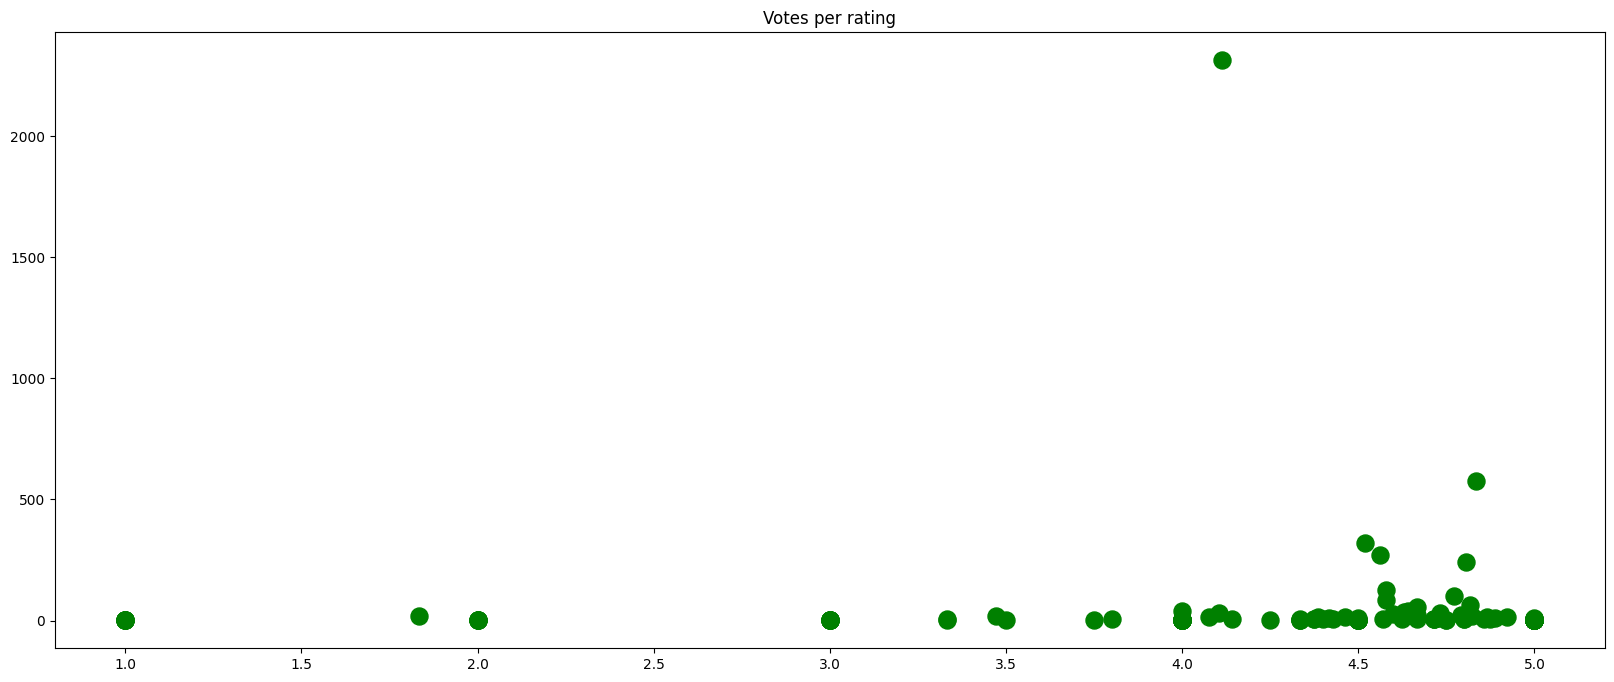

In [34]:
plt.figure(figsize=(20,8))
plt.title('Votes per rating')
plt.scatter(df_ranked['eff_score'],df_ranked['votes'],color='g',s=150)
plt.show()

Behavorial Analysis of consumer

In [35]:
consumer=df.T
consumer.head()

,0,1,2,3,4,5,6,7,8,9,...,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
user_id,A3R5OBKS7OM2IR,AH3QC2PC1VTGP,A3LKP6WPMP9UKX,AVIY68KEPQ5ZD,A1CV1WROP5KTTW,AP57WZ2X4G0AA,A3NMBJ2LCRCATT,A5Y15SAOMX6XA,A3P671HJ32TCSF,A3VCKTRD24BG7K,...,A31KDG42LDKA68,A1ZW2GF8QLTG62,A15W9FRLBUXJNS,AQ4JA4RFC5QHI,A1HY5DOJCVB8MG,A1IMQ9WMFYKWH5,A1KLIKPUF5E88I,A5HG6WFZLO10D,A3UU690TWXCG1X,AI4J762YI6S06
Movie1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie4,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
consumer.shape

(207, 4848)

In [37]:
print('Given rating :')

207-consumer.isnull().sum()

Given rating :


0       3
1       2
2       2
3       2
4       2
       ..
4843    2
4844    2
4845    2
4846    2
4847    2
Length: 4848, dtype: int64

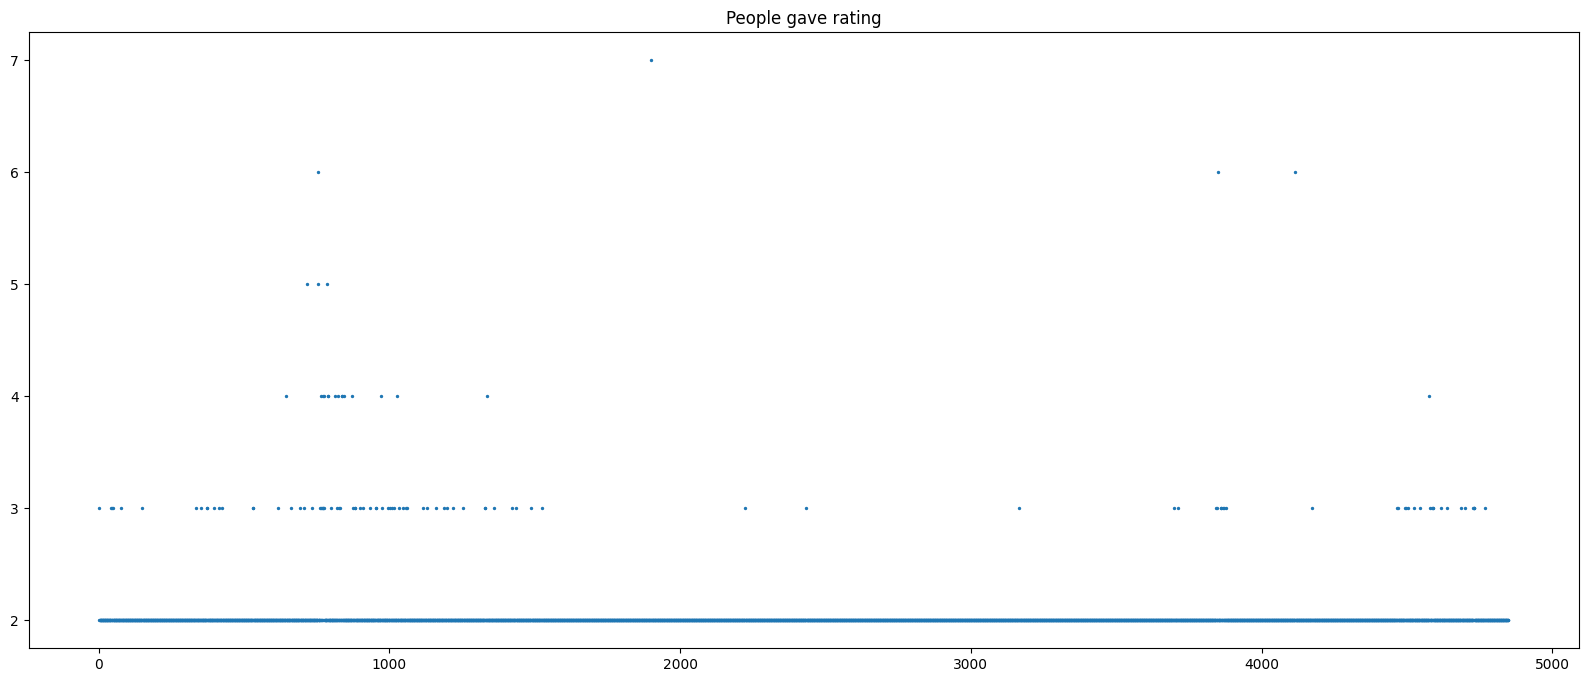

In [38]:
m=consumer.isnull().sum()
plt.figure(figsize=(20,8))
plt.title('People gave rating')
plt.scatter(np.arange(1,len(m)+1),207-m,s=2)
plt.show()

In [39]:
consumer.fillna(0.0,inplace=True)

In [40]:
c1=consumer.drop('user_id',axis=0)
c1.head()

,0,1,2,3,4,5,6,7,8,9,...,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847
Movie1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie4,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie5,0.0,0.0,0.0,0.0,5.0,2.0,5.0,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


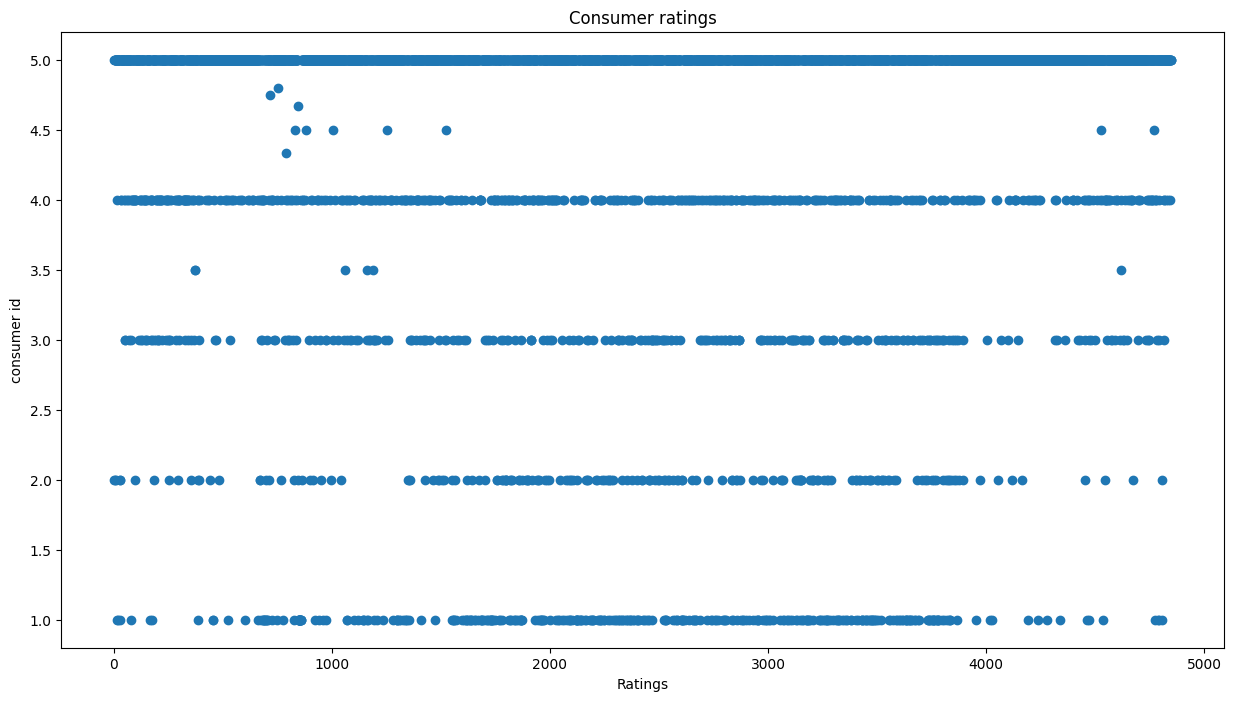

In [41]:
average_rating=[]
ratings_given=[]
for i in c1.columns:
  val=c1[i].sum()/(len(c1[c1[i]>0]))
  average_rating.append(val)
  ratings_given.append(len(c1[c1[i]>0]))
plt.figure(figsize=(15,8))
plt.title('Consumer ratings')
plt.xlabel('Ratings')
plt.ylabel('consumer id')
plt.scatter(np.arange(1,len(average_rating)+1,1),average_rating)
plt.show()

In [42]:
con_data=pd.DataFrame({'id':np.arange(1,4849,1),'av_rating':average_rating,'rating_count':ratings_given})
con_data.head()

,id,av_rating,rating_count
0,1,5.0,2
1,2,2.0,1
2,3,5.0,1
3,4,5.0,1
4,5,5.0,1


In [43]:
con_data.sort_values(by=['av_rating','rating_count'],ascending=False)

,id,av_rating,rating_count
1899,1900,5.0,6
3850,3851,5.0,5
4114,4115,5.0,5
754,755,5.0,4
784,785,5.0,4
...,...,...,...
4537,4538,1.0,1
4775,4776,1.0,1
4787,4788,1.0,1
4792,4793,1.0,1


In [44]:
con_data.sort_values(by=['rating_count','av_rating'],ascending=False)

,id,av_rating,rating_count
1899,1900,5.0,6
3850,3851,5.0,5
4114,4115,5.0,5
753,754,4.8,5
754,755,5.0,4
...,...,...,...
4537,4538,1.0,1
4775,4776,1.0,1
4787,4788,1.0,1
4792,4793,1.0,1


In [45]:
len(con_data.loc[(con_data.av_rating<2) & (con_data.rating_count<2)])

357

In [46]:
fin_data=con_data.loc[(con_data.av_rating>=2) | (con_data.rating_count>=2)]

In [47]:
fin_data

,id,av_rating,rating_count
0,1,5.0,2
1,2,2.0,1
2,3,5.0,1
3,4,5.0,1
4,5,5.0,1
...,...,...,...
4843,4844,5.0,1
4844,4845,5.0,1
4845,4846,5.0,1
4846,4847,5.0,1


In [48]:
well_subscribers=[]

#print("The list of names of good subscribers are :")
for i in fin_data['id']:
  try:
    #print(df['user_id'][i])
    well_subscribers.append(df['user_id'][i])
  except:
    pass
well_subscribers=pd.DataFrame({'names':well_subscribers})
well_subscribers.to_csv('well_subscribers.csv',index=False)

In [49]:
best_film_data=con_data.loc[(con_data.av_rating>5) | (con_data.rating_count>=4)]

In [50]:
len(best_film_data)

7

In [51]:
best_film_data

,id,av_rating,rating_count
717,718,4.75,4
753,754,4.80,5
754,755,5.00,4
784,785,5.00,4
1899,1900,5.00,6
3850,3851,5.00,5
4114,4115,5.00,5


In [52]:
movie_name=[]

for i in best_film_data['id']:
  for j in df.iloc[i-1][df.iloc[i-1].isnull()==False].index[1:]:
    if j  not in movie_name:
      movie_name.append(j)

      

In [53]:
movie_name

['Movie77',
 'Movie79',
 'Movie88',
 'Movie99',
 'Movie86',
 'Movie90',
 'Movie92',
 'Movie95',
 'Movie102',
 'Movie91',
 'Movie103',
 'Movie107',
 'Movie89',
 'Movie127',
 'Movie140',
 'Movie188',
 'Movie189',
 'Movie190',
 'Movie191',
 'Movie133',
 'Movie147',
 'Movie148',
 'Movie149',
 'Movie161']